In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
import os
os.chdir("/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data")

# Kmeans clustering

In [ ]:
df = pd.read_csv('data_tsne.csv')

In [ ]:
df.head()

,Unnamed: 0,0,1
0,0,4.714117,-11.765559
1,1,9.901565,-29.617847
2,2,-9.708199,42.088722
3,3,26.507421,20.254747
4,4,-1.198739,-23.605417


In [ ]:
os.chdir("/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data/after11 14")

In [ ]:
Jo from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=4)
kmeans.fit(df.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
result_by_sklearn = df.copy()

In [ ]:
result_by_sklearn["cluster"] = kmeans.labels_

In [ ]:
kmeans.labels_

array([3, 1, 2, ..., 3, 1, 0], dtype=int32)

In [ ]:
result_by_sklearn

,Unnamed: 0,0,1,cluster
0,0,4.714117,-11.765559,3
1,1,9.901565,-29.617847,1
2,2,-9.708199,42.088722,2
3,3,26.507421,20.254747,3
4,4,-1.198739,-23.605417,1
...,...,...,...,...
2115,2115,8.487633,-28.205349,1
2116,2116,-18.509344,-31.116838,1
2117,2117,18.773027,-1.606205,3
2118,2118,3.975841,-69.901800,1


In [ ]:
grouped = result_by_sklearn.groupby('cluster')

In [ ]:
grouped.size()

cluster
0    434
1    599
2    502
3    585
dtype: int64

In [ ]:
grouped.get_group(3)

,Unnamed: 0,0,1,cluster
0,0,4.714117,-11.765559,3
3,3,26.507421,20.254747,3
5,5,1.203124,18.795890,3
6,6,34.840828,-6.415545,3
8,8,5.894645,-1.948997,3
...,...,...,...,...
2103,2103,19.759140,-10.972408,3
2105,2105,40.590645,-0.953733,3
2106,2106,16.019455,-14.444042,3
2108,2108,33.107647,5.137001,3


In [ ]:
kmeans.inertia_ # 낮을수록 좋음

740448.265707856

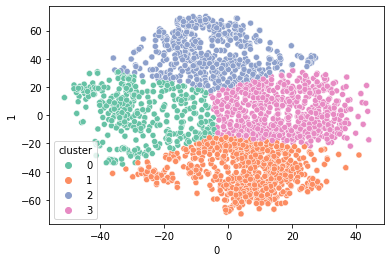

In [ ]:
sns.scatterplot(x="0", y="1", hue="cluster", data=result_by_sklearn, palette="Set2");

In [ ]:
os.chdir("/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data/before11 14 ")
df_name = pd.read_csv('pca_scailing_391.csv')

In [ ]:
df_name = df_name['name']

In [ ]:
result = pd.concat([df_name, result_by_sklearn],ignore_index=True,axis=1)


In [ ]:
result.iloc[:,0] = result.iloc[:,0].str.replace(pat=r'[^\w]', repl=r'', regex=True)
result = pd.DataFrame(result)

In [ ]:
result.columns = [['name','index','0','1','cluster']]
result

,name,index,0,1,cluster
0,무삭제귀멸의칼날,0,4.714117,-11.765559,3
1,주술회전part1,1,9.901565,-29.617847,1
2,지박소년하나코군,2,-9.708199,42.088722,2
3,호리미야,3,26.507421,20.254747,3
4,주술회전part2,4,-1.198739,-23.605417,1
...,...,...,...,...,...
2115,요란THEPRINCESSOFSNOWANDBLOOD,2115,8.487633,-28.205349,1
2116,게드전기어스시의전설,2116,-18.509344,-31.116838,1
2117,더빙지브리컬렉션vol3,2117,18.773027,-1.606205,3
2118,이웃집야마다군,2118,3.975841,-69.901800,1


In [ ]:
os.chdir("/content/drive/Shareddrives/행복 범주 화이팅!/이미지현/data/after11 14")
result.to_csv('tsne_kmeans4_5.csv',encoding = 'utf-8-sig')

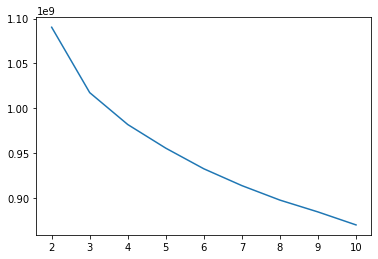

In [ ]:
#import matplotlib.pyplot as plt
#wcss=[]
#ks = []
#for k in range(2,11):
#    kmeans = KMeans(n_clusters = k, random_state=0).fit(df.iloc[:,2:])
#    wcss.append(kmeans.inertia_)
#    ks.append(k)
#plt.plot(ks, wcss)

# 새로운 클러스터링


#### Affinity Propagation

In [ ]:
df = pd.read_csv('data_tsne.csv')

In [ ]:
df.head()

In [ ]:
feature = df.iloc[:,2:]
feature.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971
0,-67.513844,74.595183,119.098436,-111.469554,153.246772,89.006228,-55.877156,-66.665690,36.021526,31.472798,12.917118,-43.275407,24.351817,34.951177,-3.712460,31.294078,-41.656156,30.296474,-15.597383,-23.515190,-3.530411,38.639996,-3.602240,-32.719517,-24.572438,-50.707102,11.939482,21.623372,0.443120,14.652124,-14.278061,41.123302,12.412133,15.459893,-8.815438,11.769649,-27.427954,-11.040796,25.807192,6.410344,...,-2.194230,-3.447089,3.847842,-0.582085,-5.706581,4.419260,-4.579712,-3.916264,-4.051958,-4.112848,-3.745800,-2.379980,-4.104751,-1.749270,-0.547489,2.381898,1.203640,-3.770334,1.163109,-0.746690,-4.834709,2.856440,0.154379,-0.726392,4.280939,2.780360,-6.057694,-0.046122,3.031159,-0.639258,-0.300687,-4.019489,0.469202,0.009430,-2.412244,-0.374227,-3.246091,5.785497,-2.709415,-1.396155
1,-313.363600,77.424512,35.449952,-51.124722,183.708003,46.535202,-5.171595,-33.080841,37.729616,-84.379426,-4.572069,6.429080,23.981278,-46.941635,36.275380,-80.331040,-14.927533,-60.377435,25.634867,25.121814,-6.172866,10.638035,-5.619790,33.037993,10.888233,-18.078708,-12.729708,-5.695848,-21.090048,-12.045747,-23.239630,-23.775807,30.510701,7.735176,20.561286,7.079741,-0.736596,9.418295,-3.165462,-14.585981,...,-1.201936,-1.466685,-2.768492,1.515715,0.622550,-2.977990,2.895313,-0.080417,1.042424,1.427300,-0.587807,1.326084,1.424356,-0.313371,3.928826,-2.450205,4.295012,-3.448760,-3.632349,-0.515302,-3.664947,-1.885219,0.037561,1.445509,0.098759,1.237880,-0.822198,-3.064034,0.378545,-1.447873,-1.791671,6.179373,5.206797,0.991255,0.050936,1.297969,0.690128,-1.695290,2.905976,-0.445700
2,303.410805,-99.463278,75.688540,-40.453952,-70.423261,-51.102666,-19.104172,-31.519266,46.578918,6.662873,161.586278,-39.257108,110.403076,32.084381,2.623960,17.585608,-13.594939,-94.535481,37.745255,43.293650,46.484060,-22.233045,-37.139344,2.870329,-11.842880,-5.867244,-18.086710,18.288301,38.032049,-17.971472,19.557893,-1.823962,41.932217,-17.303211,20.042716,29.103058,-11.154383,-7.220287,-41.445420,4.512545,...,2.421860,-1.774365,-2.138220,-9.176316,8.845603,1.930983,1.170504,-1.911657,-6.359315,-4.775645,-11.876708,8.781753,-6.251090,8.422991,-4.790282,-1.656301,-2.815200,-5.439051,-3.325590,3.567724,-5.149391,0.073370,3.257170,-3.549835,-14.458059,-3.670855,4.528787,-4.531127,3.804074,2.370279,-10.041611,2.020931,-5.512221,0.722245,4.862850,-2.816834,11.816243,-2.991449,4.728565,-8.662672
3,29.557922,-165.664473,129.637143,-100.743800,-80.283822,-87.993281,50.926283,46.451057,81.803033,-83.504771,-45.371710,-76.479228,-97.827859,19.281055,-77.086662,-5.416895,38.445917,1.400076,-42.965558,78.551558,-33.085335,-32.454494,42.732931,-41.164527,-14.881832,-21.885181,20.215412,-27.708566,-6.397919,7.505267,15.877668,20.732261,-38.775741,20.905781,8.917338,16.721265,-10.235829,-0.724564,-15.489484,-12.332254,...,1.681258,-6.542100,7.624433,-6.429638,-10.266395,1.948358,-10.378182,-2.680380,0.577192,-1.165375,0.524277,5.792333,6.299336,-1.047425,-5.126372,19.296798,-2.088715,-2.732188,3.908748,-2.049125,1.111044,-0.718693,0.996982,2.832164,-0.936606,-3.831337,3.435778,8.778203,0.734566,8.646375,3.025480,5.072736,-10.680204,-2.317660,-8.545688,-7.162475,-3.322525,5.169855,-0.429048,6.538454
4,-309.455508,116.449529,4.729160,-6.499088,53.116868,70.908312,-58.752303,60.606020,26.732667,-36.042750,5.925421,-2.271298,-3.007484,-27.235053,23.968241,-15.484795,-58.489950,3.118443,-8.586446,17.068913,16.374815,-29.100975,27.254952,-12.955095,1.428992,-25.581302,32.022960,15.191400,24.771982,-29.087907,17.403598,1.166706,46.758739,22.940500,-21.281108,29.576725,1.026368,5.208435,3.787383,-2.853891,...,-5.391508,0.330838,2.331034,-1.669335,4.422971,1.233043,-1.031296,5.545067,-3.971016,-1.5

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import *  #silhoutte coefficient 쓰자

#최적의 k 개수 찾기
num_info=[]
num_model = AffinityPropagation(damping=0.9).fit(feature)
n_cluster_centers_indices = num_model.cluster_centers_indices_
n_labels = num_model.labels_
num_info.append(silhouette_score(feature, n_labels, metric='sqeuclidean'))
num_info.append(len(n_cluster_centers_indices))

In [ ]:
print(num_info) # 실루엣값 0.03 폐기

[0.03140887572301383, 317]


####Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

In [ ]:
n_linkage_mat = linkage(feature, method="ward")
euc_scores = euclidean_distances(feature)

In [ ]:
silh_score = -2
for i in range(3,16):
    local_labels=list(cut_tree(n_linkage_mat,n_clusters=i).flatten())
    sc=silhouette_score(
        euc_scores, metric='precomputed',labels=local_labels, random_state=42
    )
    if silh_score<sc:
        silh_score=sc; labels=local_labels

print(len(set(labels)))
print(silh_score) #0.08  >> 폐기

5
0.0844163402726187


####Gaussian Mixture Model

In [ ]:
from sklearn import metrics
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
    
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
n_clusters=np.arange(2, 20)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(feature)
        labels=gmm.predict(feature)
        sil=metrics.silhouette_score(feature, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")  #실화야?

# T-SNE로 나타내보기

In [ ]:
from sklearn.manifold import TSNE
#2차원으로 차원 축소
n_components = 2 

# t-sne 모델 생성
model = TSNE(n_components=n_components)

In [ ]:
kmeans_tsne = model.fit_transform(df.iloc[:,1:])

In [ ]:
kmeans_tsne = pd.DataFrame(kmeans_tsne)
kmeans_tsne['cluster'] = kmeans.labels_

In [ ]:
kmeans_tsne

,0,1,cluster
0,14.433086,-0.024997,0
1,33.601105,-7.659593,1
2,-39.342636,15.664703,3
3,0.661677,36.288738,0
4,21.301985,-12.290322,1
...,...,...,...
2115,31.815977,-7.690207,1
2116,15.834736,-26.559097,1
2117,14.489470,18.091455,0
2118,61.623379,-32.140812,1


In [ ]:
kmeans_tsne

,0,1,cluster
0,-10.437631,-7.566026,0
1,-22.651508,-23.372236,1
2,24.753334,35.326717,3
3,-16.882444,29.702234,0
4,-9.892794,-21.204041,1
...,...,...,...
2115,-21.126026,-22.516743,1
2116,1.474775,-30.905891,1
2117,-19.990236,7.303132,0
2118,-33.955215,-58.318279,1


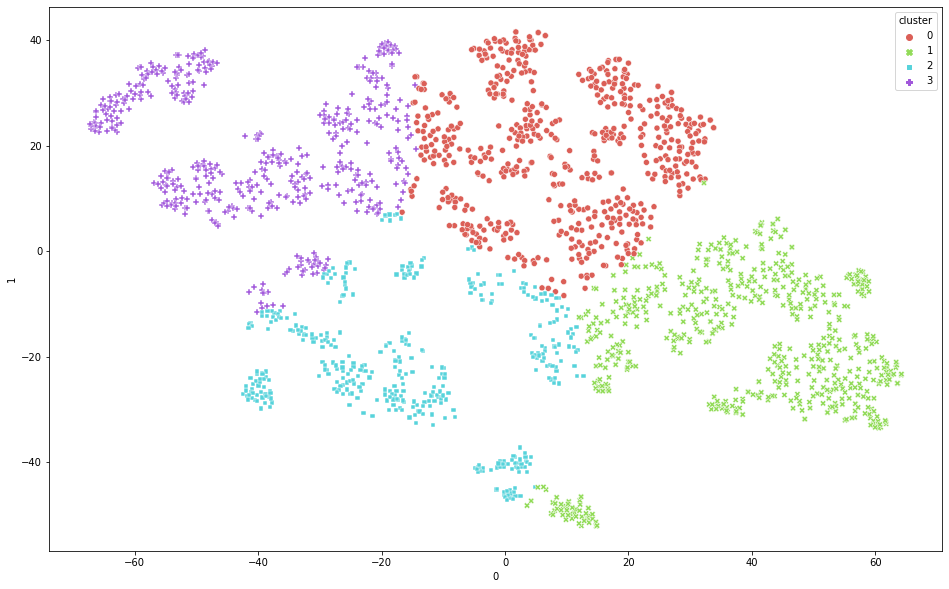

In [ ]:
# 시각화
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
    hue = 'cluster',
    style = 'cluster',
    data=kmeans_tsne,
    palette=sns.color_palette("hls", 4) # 숫자는 클러스터 개수로 바꿔줘야함
)
plt.show()

In [ ]:
result

,0,1,2,3
0,['(무삭제) 귀멸의 칼날'],-10.437631,-7.566026,0
1,['주술회전 part 1'],-22.651508,-23.372236,1
2,['지박소년 하나코 군'],24.753334,35.326717,3
3,['호리미야'],-16.882444,29.702234,0
4,['주술회전 part 2'],-9.892794,-21.204041,1
...,...,...,...,...
2115,['요란 THE PRINCESS OF SNOW AND BLOOD'],-21.126026,-22.516743,1
2116,['게드 전기 어스시의 전설'],1.474775,-30.905891,1
2117,['(더빙) 지브리 컬렉션 vol. 3'],-19.990236,7.303132,0
2118,['이웃집 야마다군'],-33.955215,-58.318279,1
